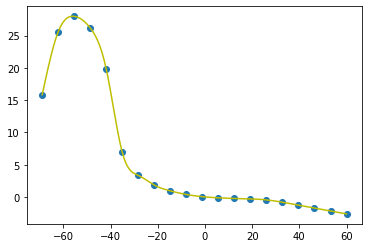

In [5]:
from scipy import sqrt
from re import X
from tkinter import Y
from numpy import *
from matplotlib.pyplot import *
from scipy.integrate import quad
from scipy.optimize import fsolve
from numpy.linalg import *
import bisect


from re import X
from tkinter import Y
from numpy import *
from matplotlib.pyplot import *
from scipy.integrate import quad
from scipy.optimize import fsolve
from numpy.linalg import *
import bisect

def cubicspline(xint,yint):
    d1=array(diagflat([4 for i in range (len(xint)-2)], ))
    d2=array(diagflat([1 for i in range (len(xint)-3)], 1))
    d3=array(diagflat([1 for i in range (len(xint)-3)], -1))
    d=d1+d2+d3
    h=xint[-1]-xint[-2]
    y=array([yint[i+2]-2*yint[i+1]+yint[i] for i in range(len(xint)-2)])
    h1=6/h**2
    h=array([xint[i+1]-xint[i] for i in range(len(xint)-1)])
    sigma1=(dot(inv(d),h1))
    sigma=list(dot(sigma1,y))
    sigma.insert(0,0)
    sigma.insert(len(sigma),0)
    coeff=[]
    for i in range (len(sigma)-1):
        coef=[]
        ai=(sigma[i+1]-sigma[i])/(6*h[i])
        bi=sigma[i]/2
        ci=(yint[i+1]-yint[i])/h[i]-h[i]*(2*sigma[i]+sigma[i+1])/6
        di=yint[i]
        coef.extend([ai,bi,ci,di])
        coeff.append(coef)
    return coeff
def cubicsplineval(coeff,xint,xval):
    idx = min(bisect.bisect(xint, xval)-1, len(xint)-2)
    z = (xval - xint[idx])
    C = coeff[idx]
    return (C[0] * z**3) + C[1] * z**2 + C[2] * z + C[3]

def s1002(S):
    """
    this function describes the wheel profile s1002
    according to the standard. 
    S  independent variable in mm bewteen -69 and 60.
    wheel   wheel profile value
    (courtesy to Dr.H.Netter, DLR Oberpfaffenhofen)
                                             I
                                             I
                     IIIIIIIIIIIIIIIIIIIIIIII
                   II  D  C       B       A
                  I 
       I         I   E
        I       I
     H   I     I   F
          IIIII

            G


    FUNCTIONS:
    ---------- 
    Section A:   F(S) =   AA - BA * S                 
    Section B:   F(S) =   AB - BB * S    + CB * S**2 - DB * S**3
                             + EB * S**4 - FB * S**5 + GB * S**6
                             - HB * S**7 + IB * S**8
    Section C:   F(S) = - AC - BC * S    - CC * S**2 - DC * S**3
                             - EC * S**4 - FC * S**5 - GC * S**6
                             - HC * S**7
    Section D:   F(S) = + AD - SQRT( BD**2 - ( S + CD )**2 )
    Section E:   F(S) = - AE - BE * S
    Section F:   F(S) =   AF + SQRT( BF**2 - ( S + CF )**2 )
    Section G:   F(S) =   AG + SQRT( BG**2 - ( S + CG )**2 )
    Section H:   F(S) =   AH + SQRT( BH**2 - ( S + CH )**2 )
    """
#    Polynom coefficients:
#     Section A:    
    AA =  1.364323640
    BA =  0.066666667
                     
#     Section B:     
    AB =  0.000000000
    BB =  3.358537058e-02
    CB =  1.565681624e-03
    DB =  2.810427944e-05
    EB =  5.844240864e-08
    FB =  1.562379023e-08
    GB =  5.309217349e-15
    HB =  5.957839843e-12
    IB =  2.646656573e-13
#     Section C:     
    AC =  4.320221063e+03
    BC =  1.038384026e+03
    CC =  1.065501873e+02
    DC =  6.051367875
    EC =  2.054332446e-01
    FC =  4.169739389e-03
    GC =  4.687195829e-05
    HC =  2.252755540e-07
#     Section D:     
    AD = 16.446
    BD = 13.
    CD = 26.210665
#     Section E: 
    AE = 93.576667419
    BE =  2.747477419
#     Section F:     
    AF =  8.834924130
    BF = 20.
    CF = 58.558326413
#     Section G:   
    AG = 16.
    BG = 12.
    CG = 55.
#     Section H:   
    AH =  9.519259302
    BH = 20.5
    CH = 49.5
    """
     Bounds
                       from                    to
    Section A:      Y = + 60               Y = + 32.15796
    Section B:      Y = + 32.15796         Y = - 26.
    Section C:      Y = - 26.              Y = - 35.
    Section D:      Y = - 35.              Y = - 38.426669071
    Section E:      Y = - 38.426669071     Y = - 39.764473993
    Section F:      Y = - 39.764473993     Y = - 49.662510381
    Section G:      Y = - 49.662510381     Y = - 62.764705882
    Section H:      Y = - 62.764705882     Y = - 70.
    """
    YS = [-70., -62.764705882, -49.662510381, -39.764473993, -38.426669071, -35., -26., 32.15796, 60.]
    if (S < YS[1]):
#       Section H (Circular arc) 
        radiant =  BH**2 - ( S + CH )**2
        sqroot  = sqrt(radiant)
        wheel  =   AH + sqroot
    elif (S  < YS[2]):
#       Section G (Circular arc) 
        radiant =  BG**2 - ( S + CG )**2
        sqroot  = sqrt(radiant)
        wheel  =   AG + sqroot
    elif (S < YS[3]):
#       Section F (Circular arc) 
        radiant =  BF**2 - ( S + CF )**2
        sqroot  = sqrt(radiant)
        wheel  =   AF + sqroot
    elif (S < YS[4]):
#       Section E (LINEAR)
        wheel   = -BE*S-AE
    elif (S < YS[5]):
#       Section D (Circular arc) 
        radiant =  BD**2 - ( S + CD )**2
        sqroot  = sqrt(radiant)
        wheel  =   AD - sqroot
    elif (S < YS[6]):
#       Section C  
        wheel = - AC - BC * S - CC * S**2 - DC * S**3 - EC * S**4 - FC * S**5 - GC * S**6 - HC * S**7;  
    elif (S < YS[7]):
#       Section B
        wheel =   AB - BB * S + CB * S**2 - DB * S**3 + EB * S**4 - FB * S**5 + GB * S**6 - HB * S**7 + IB * S**8;
    else:
#       Section A (LINEAR)            
        wheel =   -BA*S + AA;
    return wheel



xint = linspace(-69,60,20)
x_new =linspace(-69,60,10000)
yint = [s1002(i) for i in xint]
#z2 = [exp(-4*i**2) for i in xint]
#z3 = [exp(-4*i**2) for i in x_new]
#plot(x_new, z3,'r')
plot(xint, yint,"o")
#print(cubicspline(xint,yint))

y_vals = [cubicsplineval(cubicspline(xint,yint),xint,i) for i in x_new]
plot(x_new, y_vals,'y')
show()